## Part 0 - Simple DNN


In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Training examples: %d" % train_images.shape[0])
print("Testing examples: %d" % test_images.shape[0])

Training examples: 60000
Testing examples: 10000


In [ ]:
print("Number of labels: %d" % len(set(train_labels)))

Number of labels: 10


In [ ]:
print("Image size: %d x %d" % (len(train_images[0]), len(train_images[0][0])))

Image size: 28 x 28


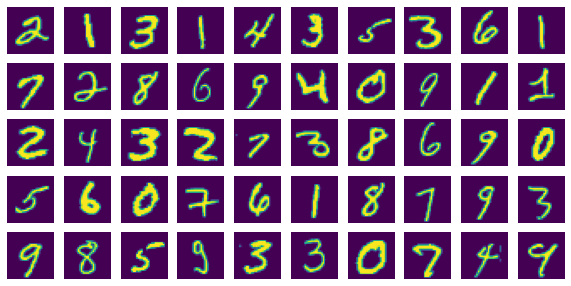

In [ ]:
plt.rcParams['figure.figsize'] = (1.0, 1.0)
col1 = 5
row1 = 1
col2 = 10
row2 = 5
fig = plt.figure(figsize=(col2, row2))
for index in range(col1*row1, col1*row1 + col2*row2):
    fig.add_subplot(row2, col2, index - col1*row1 + 1)
    plt.axis('off')
    plt.imshow(train_images[index])
plt.show()

In [ ]:
# network architecture

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
# network training

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# reshape and transform the data

train_images = train_images.astype(np.float32).reshape(-1, 28*28) / 255.0
test_images = test_images.astype(np.float32).reshape(-1, 28*28) / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# fit the model

network.fit(train_images, train_labels, batch_size=128, epochs=5, verbose="True")

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [ ]:
# network evaluation

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9809
test_acc: 0.98089998960495
